In [260]:
from pprint import pprint

In [52]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [239]:
import datetime

# MEMBERS

In [5]:
members = pd.read_csv("members.csv", parse_dates=["registration_init_time", "expiration_date"])

In [6]:
members.rename(columns={"msno": "member"}, inplace=True)

In [7]:
members.head()

,member,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [8]:
members.registration_init_time.dtype

dtype('<M8[ns]')

In [249]:
# quick check
len(members) == members.member.nunique()

True

In [250]:
members.member.nunique()

34403

## MEMBERS | gender

In [11]:
members_counts = members.gender.value_counts(dropna=False)

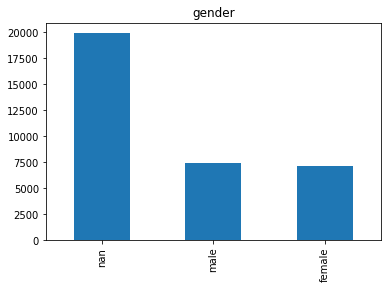

In [12]:
members_counts.plot(kind='bar', subplots=True)
plt.show()

In [16]:
print(members_counts.max() * 100 / members_counts.sum(), "% of the members have no gender value")

57.849606139 % of the members have no gender value


In [17]:
members.gender.describe()

count     14501
unique        2
top        male
freq       7405
Name: gender, dtype: object

## MEMBERS | city

In [18]:
city_counts = members.city.value_counts(dropna=False, sort=False)

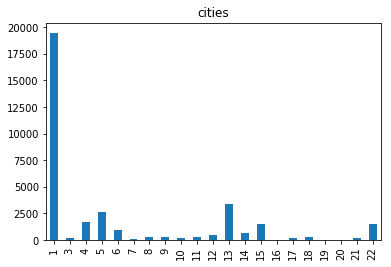

In [19]:
city_counts.plot(kind='bar', title="cities")
plt.show()

In [20]:
print(city_counts.max() * 100 / city_counts.sum(), "% of the members are concentrated in one city")

56.5212336133 % of the members are concentrated in one city


In [21]:
members.head()

,member,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


## MEMBERS | registration process

In [36]:
registration_kind = members.registered_via.value_counts(dropna=False)

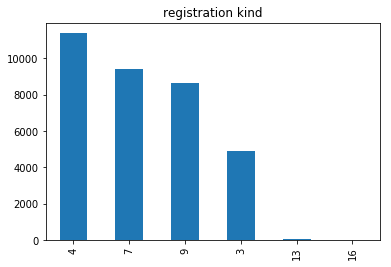

In [37]:
registration_kind.plot(kind='bar', title="registration kind")
plt.show()

In [55]:
print("Only", np.round((registration_kind[-2:].sum() * 100 / registration_kind.sum()), 1), "% of the population registered with process {} and {}".format(*registration_kind[-2:]))

Only 0.2 % of the population registered with process 70 and 1


In [56]:
registration_kind

4     11392
7      9433
9      8628
3      4879
13       70
16        1
Name: registered_via, dtype: int64

In [58]:
len(members.registered_via)

34403

### registration kind in time

In [94]:
groups = members[["registered_via", "registration_init_time"]].groupby(["registered_via"])

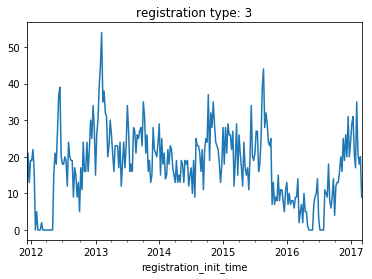

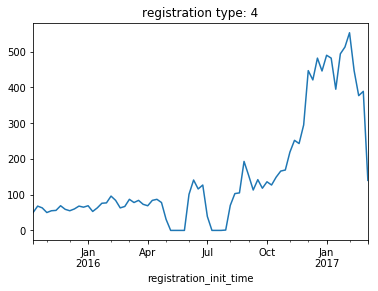

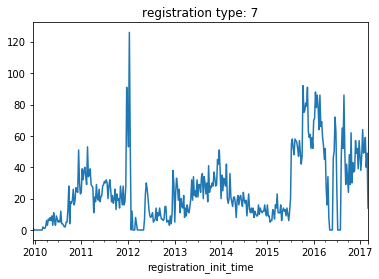

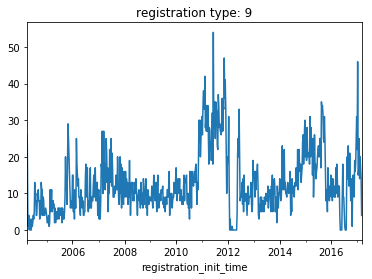

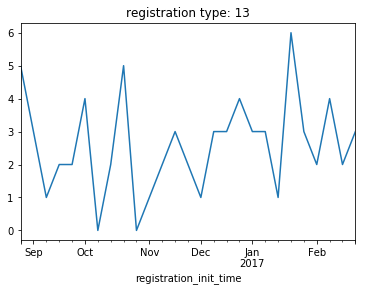

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2339.0, right=2339.0
  'left=%s, right=%s') % (left, right))


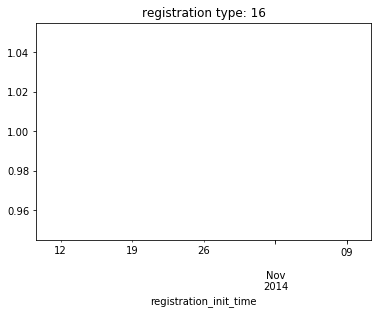

In [109]:
for name, group in groups:
    group.set_index("registration_init_time", inplace=True)
    group.resample("W").count().plot(title=f"registration type: {name}", legend=False)
    plt.show()

## MEMBERS | age

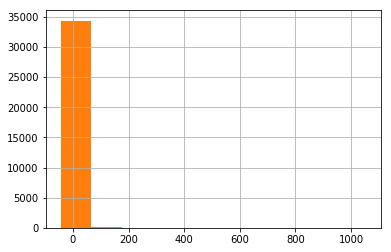

In [122]:
bdays = members.bd
bdays.hist()
plt.show()

We observe that many wsdm members are still in their mom's belly or are older than yoda.
Let's re-plot this distribution with ordinary people only.

In [135]:
credible_bd = bdays[(bdays > 0) & (bdays < 100)]

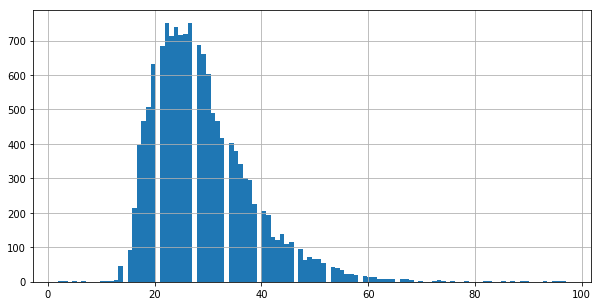

In [151]:
credible_bd.hist(bins=110, figsize=(10, 5))
plt.show()

In [191]:
print(f"The most member age is {credible_bd.mode().values[0]} years old")

The most member age is 22 years old


In [194]:
members.head()

,member,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [244]:
os.listdir()

['.DS_Store',
 '.git',
 '.idea',
 '.ipynb_checkpoints',
 'members.csv',
 'README.md',
 'sample_submission.csv',
 'song_extra_info.csv',
 'songs.csv',
 'test.csv',
 'train.csv',
 'wsdm.ipynb']

# Train

In [245]:
train = pd.read_csv("train.csv")

In [246]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [257]:
train.rename(columns={"msno": "member"}, inplace=True)

In [258]:
len(train), train.member.nunique(), train.song_id.nunique()

(7377418, 30755, 359966)

Having more songs than users, we could a priori get a model more accurate model based recommender with an item_based one. Remains to see if we can extract interesting features from the songs.

But let explore the train set a bit more before.

In [263]:
train.source_screen_name.value_counts()

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

In [264]:
train.source_system_tab.value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
null               6478
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [265]:
train.source_type.value_counts()

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64